In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set(style="darkgrid")
sns.set_palette("plasma")
plasma_colors = sns.color_palette("plasma", as_cmap=False, n_colors=12)


In [2]:
plasma_colors

[(0.21435, 0.016973, 0.599239),
 (0.343925, 0.004991, 0.64471),
 (0.46555, 0.004545, 0.660139),
 (0.573632, 0.060028, 0.637349),
 (0.674522, 0.147419, 0.578688),
 (0.760264, 0.235976, 0.505794),
 (0.830018, 0.320172, 0.437836),
 (0.89325, 0.411048, 0.369768),
 (0.944844, 0.507658, 0.302433),
 (0.979233, 0.607532, 0.238013),
 (0.994474, 0.722691, 0.174381),
 (0.98119, 0.848329, 0.142279)]

# **Dataset Exploration**

Begin by thoroughly exploring and understanding the dataset you are working with. Gain insights into its structure, variables, and any potential patterns or trends that may exist within the data.

In [5]:
df = pd.read_csv('train.csv')
df.sample(5)

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
343,4473,1.0,2.0,91.0,east,1972.0,9º - 3a,False,False,Sant Andreu,5.0,False,True,NaN,1168
3519,7823,3.0,2.0,130.0,north,NaN,6º - 3a,False,False,Sarrià-Sant Gervasi,0.0,True,False,NaN,1303
6403,2204,3.0,1.0,107.0,south,1989.0,3º - 1a,False,False,Nou Barris,6.0,True,False,NaN,959
6703,937,2.0,1.0,59.0,west,2020.0,NaN,False,True,Nou Barris,3.0,True,NaN,NaN,995
3749,7885,1.0,3.0,74.0,south,1957.0,6º - 3a,False,False,Les Cors,0.0,True,False,3.0,941


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8000 non-null   int64  
 1   num_rooms         8000 non-null   float64
 2   num_baths         7840 non-null   float64
 3   square_meters     7845 non-null   float64
 4   orientation       5659 non-null   object 
 5   year_built        7830 non-null   float64
 6   door              7851 non-null   object 
 7   is_furnished      7835 non-null   object 
 8   has_pool          7844 non-null   object 
 9   neighborhood      7835 non-null   object 
 10  num_crimes        7840 non-null   float64
 11  has_ac            7831 non-null   object 
 12  accepts_pets      7845 non-null   object 
 13  num_supermarkets  1411 non-null   float64
 14  price             8000 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 937.6+ KB


The percentage of nulls is too high that imputing those columns would imply a huge bias to the model.

In [7]:
df = df.drop(columns=['num_supermarkets', 'orientation'])

In [8]:
df.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,price
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,8000.000000
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1099.616250
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,271.686617
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,195.000000
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,905.750000
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,1104.000000
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,1295.000000
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,2095.000000


- ```num_rooms```: few outliers
- ```squeare_meters``` negative values

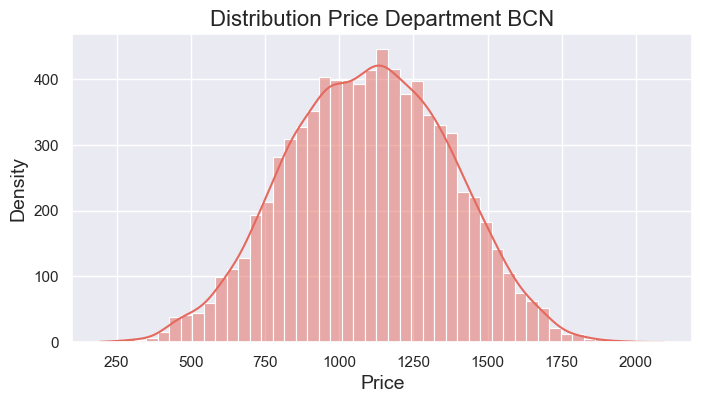

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True, color=plasma_colors[-5])
plt.title('Distribution Price Department BCN', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

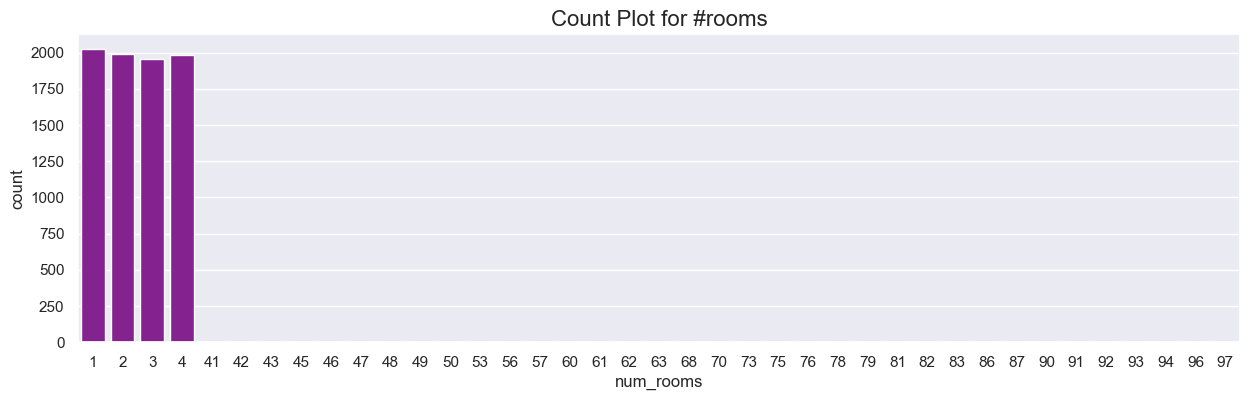

In [10]:
plt.figure(figsize=(15,4))
sns.countplot(x=df['num_rooms'].astype(int), data=df, color=plasma_colors[3])
plt.title('Count Plot for #rooms', fontsize=16)
plt.show

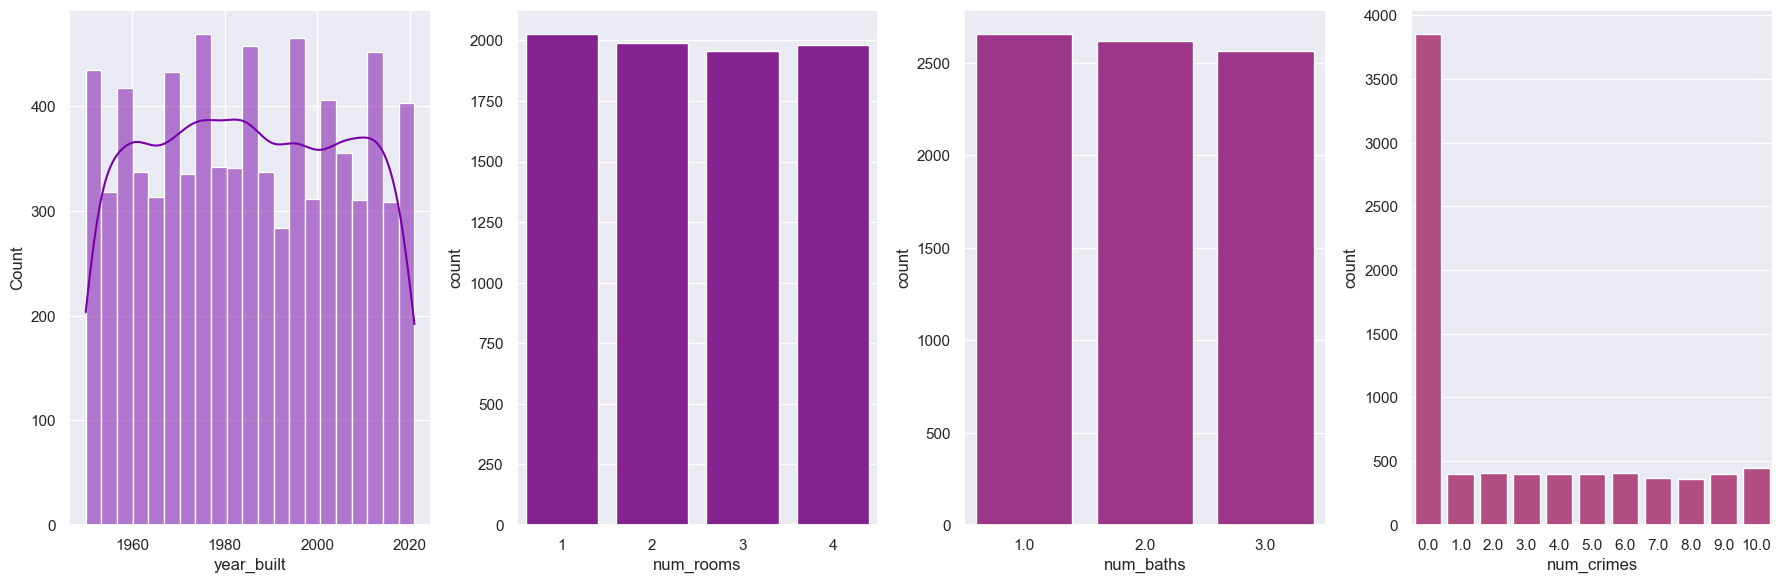

In [11]:
# Crear una figura con tres subplots en una fila
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
sns.histplot(df['year_built'], kde=True, ax=axes[0],color=plasma_colors[2])
sns.countplot(x=df.loc[df['num_rooms']<10]['num_rooms'].astype(int), data=df, ax=axes[1], color=plasma_colors[3])
sns.countplot(x=df['num_baths'], data=df, ax=axes[2], color=plasma_colors[4])
sns.countplot(x=df['num_crimes'], data=df, ax=axes[3], color=plasma_colors[5])
plt.tight_layout()
plt.show()

Apartments with more than 10 rooms seems to be unlikely, so for simplification in the exploration stage of the data those values are going to be dropped, but for the prediction stage we will need to keep those values and impute them.

In [12]:
df = df[df['num_rooms']<10]

<Axes: xlabel='num_crimes', ylabel='price'>

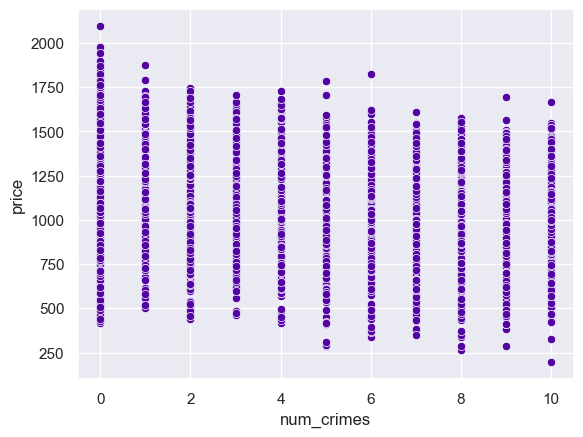

In [13]:
sns.scatterplot(x = 'num_crimes', y='price', data=df)

The number of crimes appears to be somewhat correlated with the price, especially when comparing the prices of apartments with no reported crimes to those with at least one crime.

By converting the num_crimes variable into a boolean, we can better discern the variability in price.

<Axes: ylabel='price'>

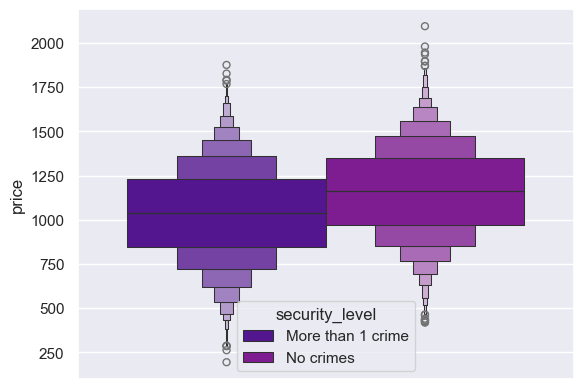

In [14]:
df['security_level'] = df['num_crimes'].apply(lambda x: 'No crimes' if x == 0 else 'More than 1 crime')
sns.boxenplot(hue= 'security_level', y='price', data=df)

Looking at the distribution by neighborhood, we can see that there is no much difference, every neighborhood seem to have the same parameters distributions (mean, variance, skewness, kurtosis), which indicate that this variables would not contain explanatory power.

<Figure size 1200x800 with 0 Axes>

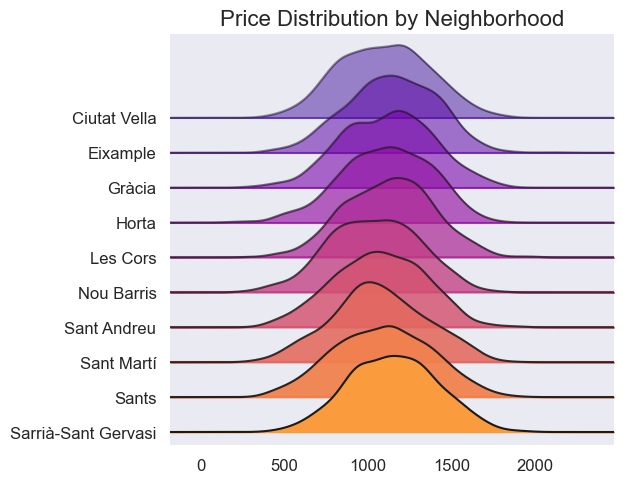

In [15]:
from joypy import joyplot
plt.figure(figsize=(12, 8))

joyplot(
    data=df,
    by='neighborhood',
    column='price',
    overlap=0.8,  
    fade=True, 
    color = plasma_colors
)

plt.title('Price Distribution by Neighborhood', fontsize=16)
plt.show()

This plot shows the average property price evolution over the years, revealing a fluctuating trend without a clear pattern, indicating that prices have experienced both increases and decreases over time.

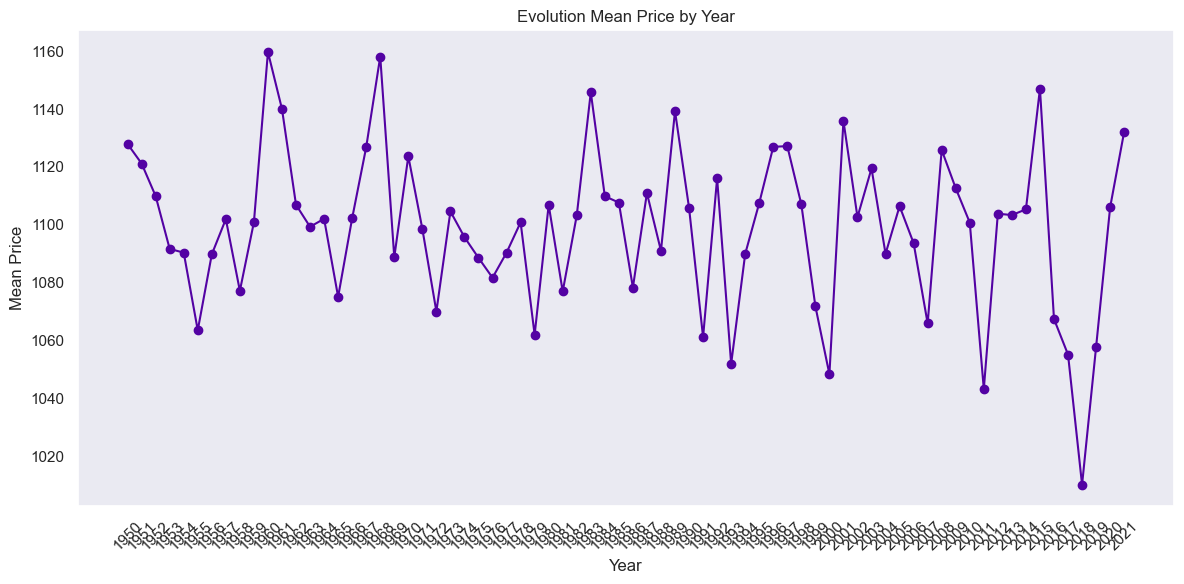

In [16]:
average_price_per_year_built = df.groupby('year_built')['price'].mean().reset_index()

# Creamos el gráfico
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year_built['year_built'], average_price_per_year_built['price'], marker='o', linestyle='-')
plt.title('Evolution Mean Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.grid()
plt.xticks(average_price_per_year_built['year_built'], rotation=45)  # Opcional: rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el layout
plt.show()

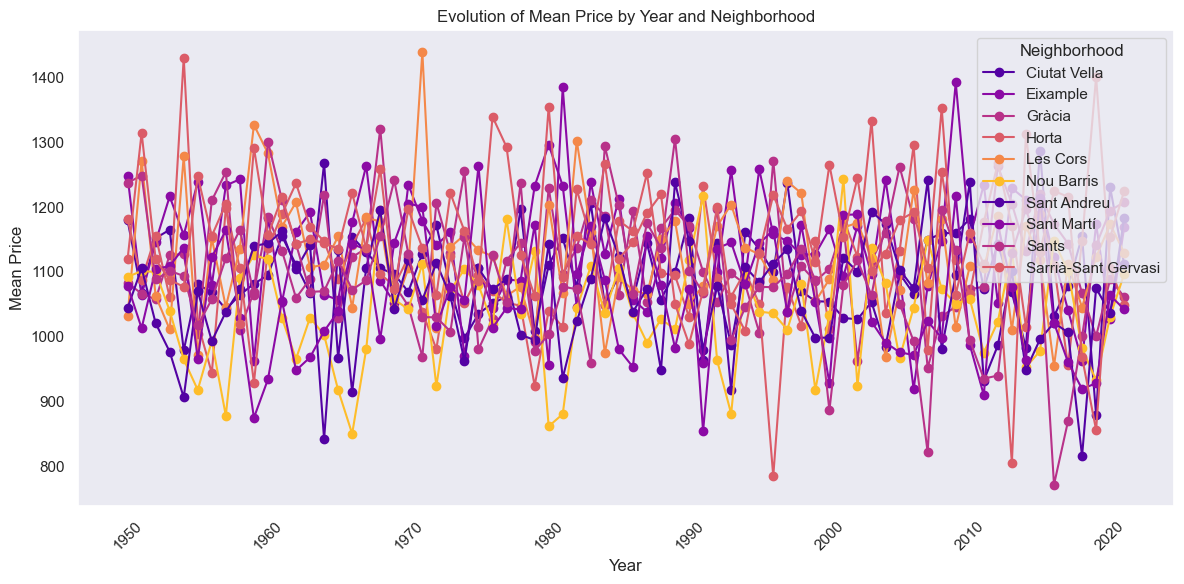

In [17]:
import matplotlib.pyplot as plt

# Calcular el precio promedio por año y vecindario
average_price_per_year_neighborhood = df.groupby(['year_built', 'neighborhood'])['price'].mean().reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar una línea para cada vecindario
for neighborhood in average_price_per_year_neighborhood['neighborhood'].unique():
    neighborhood_data = average_price_per_year_neighborhood[average_price_per_year_neighborhood['neighborhood'] == neighborhood]
    plt.plot(neighborhood_data['year_built'], neighborhood_data['price'], marker='o', linestyle='-', label=neighborhood)

# Configuración del gráfico
plt.title('Evolution of Mean Price by Year and Neighborhood')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.grid()
plt.legend(title='Neighborhood')  # Mostrar una leyenda para identificar cada vecindario
plt.xticks(rotation=45)  # Opcional: rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el layout
plt.show()


- Looking at the correlation between the year when the aparment was built and the price, it seems that there is no patter to be captured.

- Also if we consider this correlation by neighborhood:

    - **Plot 1:** This scatter plot shows the relationship between the year built and price, with colors indicating different neighborhoods, highlighting that there is no trend in property values over time by location, since the colored points are randomly located over the plot.

    - **Plot 2:** This plot illustrates the correlation between the number of rooms and property prices over different years, suggesting that larger properties generally command higher prices, particularly in older buildings where overpopulation was less of an issue in Barcelona. But from this plot no pattern is visualized.

    - **Plot 3:** This scatter plot reveals the impact of crime rates on property prices over the years, with color coding indicating the number of crimes, suggesting that neighborhoods with higher crime rates tend to have lower property values.

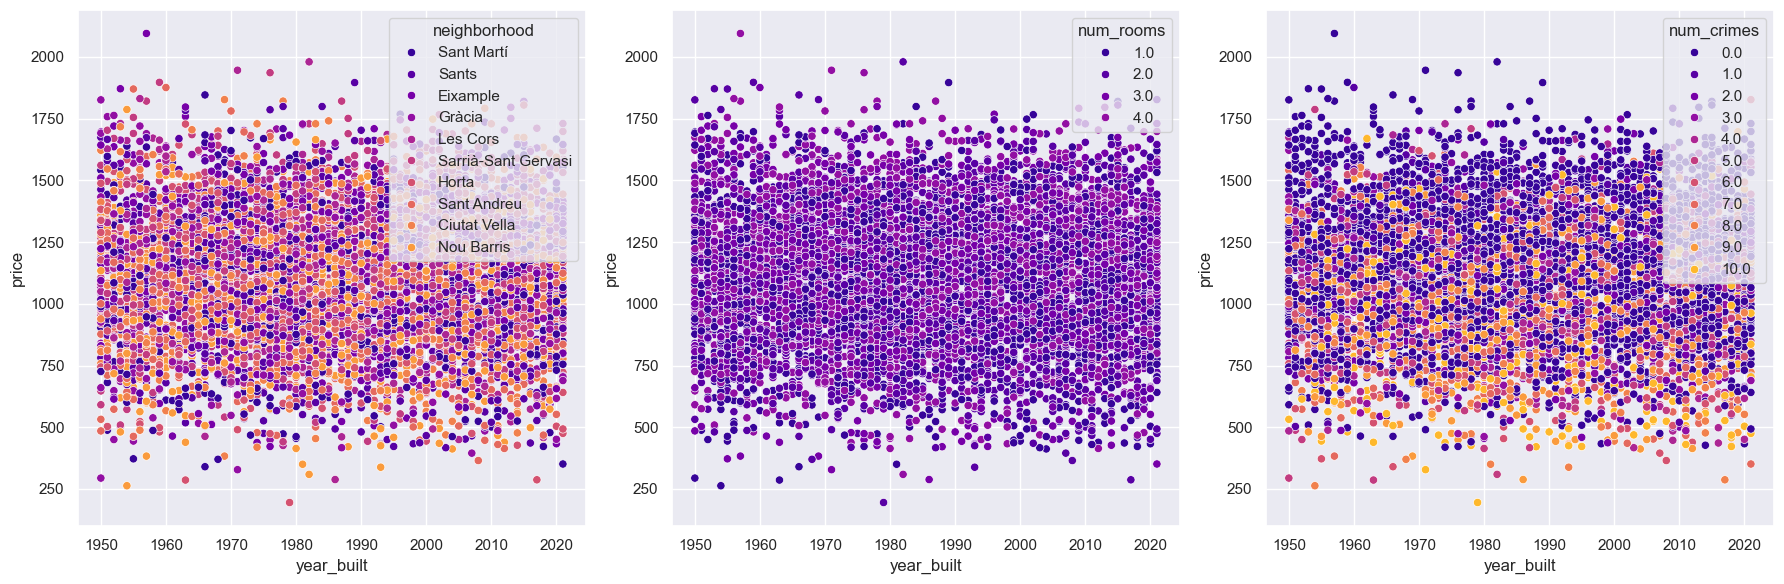

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(x='year_built', y='price', hue='neighborhood', data=df, palette=plasma_colors[:10], ax = axes[0])
sns.scatterplot(x='year_built', y='price', hue='num_rooms', data=df, palette=plasma_colors[:4], ax = axes[1])
sns.scatterplot(x='year_built', y='price', hue='num_crimes', data=df, palette=plasma_colors[:11], ax = axes[2])
plt.tight_layout()
plt.show()


The year_built_group variable is created to categorize properties into distinct age groups, allowing for a clearer analysis of how property prices and characteristics vary over time. By grouping the years into three categories (pre-1970, 1970-1990, and post-1990), we can better capture trends and patterns related to property value fluctuations, reflecting the impact of historical context, architectural styles, and changes in building regulations on market dynamics. This simplification facilitates more effective modeling and interpretation of the data.

In [19]:
def year_group(year):
    if year <= 1970:
        return 1
    elif 1970 < year <= 1990:
        return 2
    else:
        return 3

df['year_built_group'] = df['year_built'].apply(year_group)

Text(0, 0.5, 'Count')

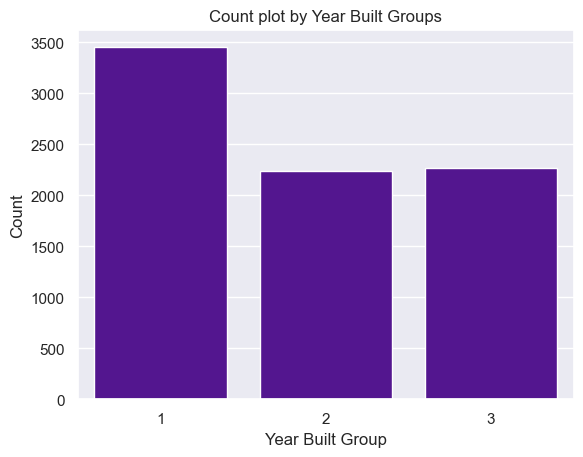

In [20]:
sns.barplot(x=df.year_built_group.unique(), y = df.year_built_group.value_counts())
plt.title('Count plot by Year Built Groups')
plt.xlabel('Year Built Group')
plt.ylabel('Count')

We can see, that even though, we try to group the data into year_group it seems that this feature is not able to capture any variability in price

<Axes: ylabel='price'>

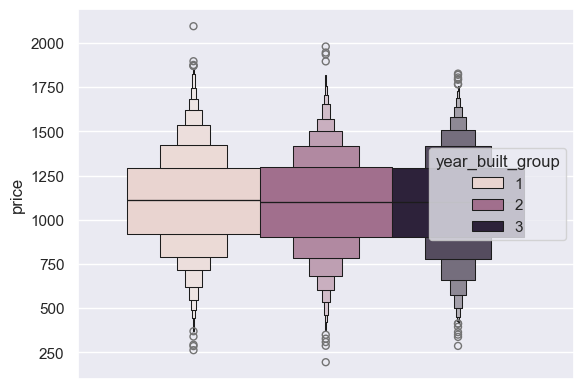

In [21]:
sns.boxenplot(hue= 'year_built_group', y='price', data=df)

This joint plot visualizes the relationship between property size (in square meters) and price, highlighting a positive correlation; as the size of the property increases, the price tends to rise as well. The regression line indicates the trend, while the scatter plot illustrates the data distribution, providing insights into the strength of this relationship.

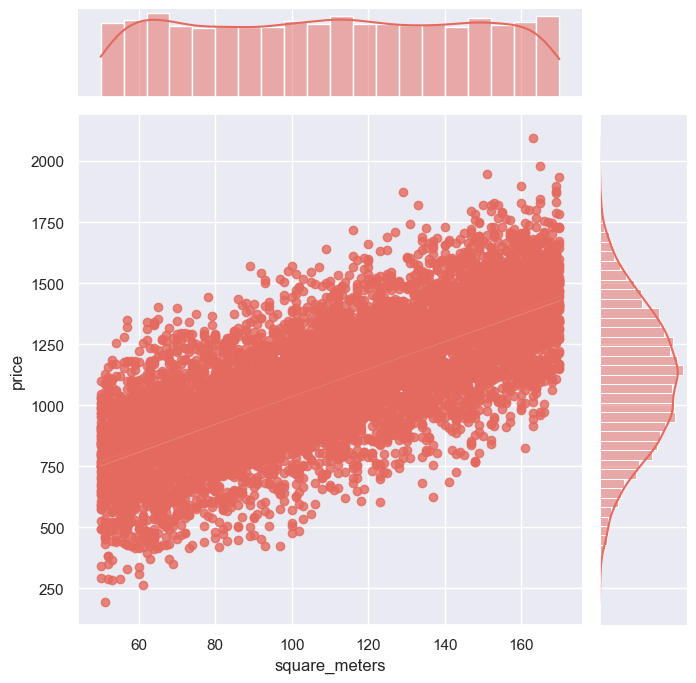

In [22]:
sns.jointplot(x=df[df["square_meters"]>0]['square_meters'], y="price", data=df, kind="reg", truncate=True, color=plasma_colors[-5], height=7)

In [23]:
df = df[df['square_meters']>0]

This scatter plot shows the relationship between property size (in square meters) and price, with points colored by neighborhood. It illustrates how prices vary across different neighborhoods, revealing potential trends or patterns in property values based on size and location. 
But the colored point are located uniformly among the axes.

/var/folders/fz/1mp_qssx1z546qc9z63nq3rm0000gn/T/ipykernel_43778/3653682774.py:1: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.scatterplot(x='square_meters', y='price', hue='neighborhood', data=df, palette=plasma_colors)


<Axes: xlabel='square_meters', ylabel='price'>

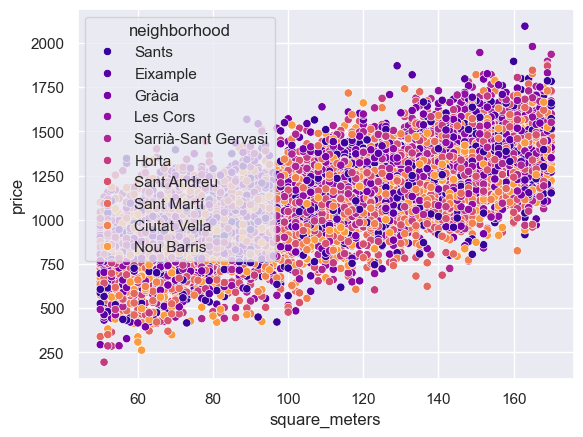

In [24]:
sns.scatterplot(x='square_meters', y='price', hue='neighborhood', data=df, palette=plasma_colors)

This plot visualize the distribution of property prices across different neighborhoods, segmented by boolean features such as whether the property is furnished, has a pool, has air conditioning, or accepts pets. Each plot provides insights into how these features influence price variations within neighborhoods. As every violin plot shows the same distribution, it seems that the features have not prediction power for price.

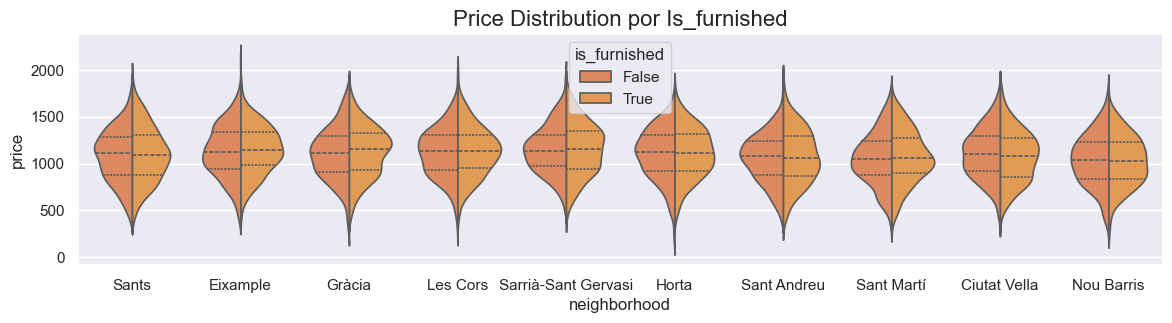

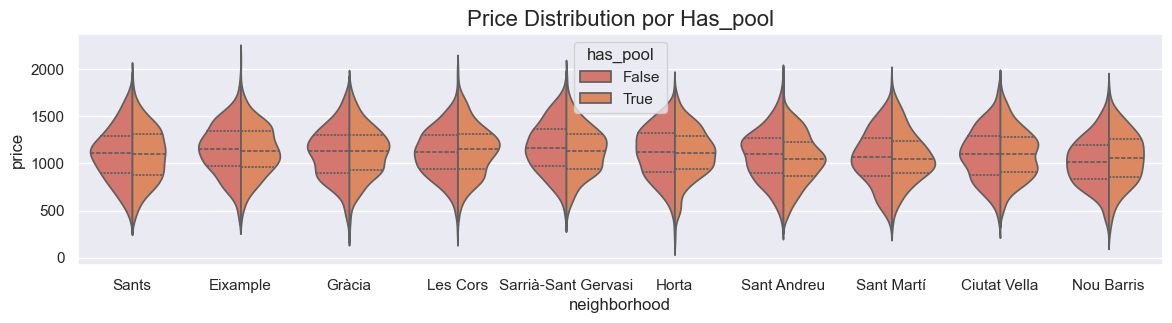

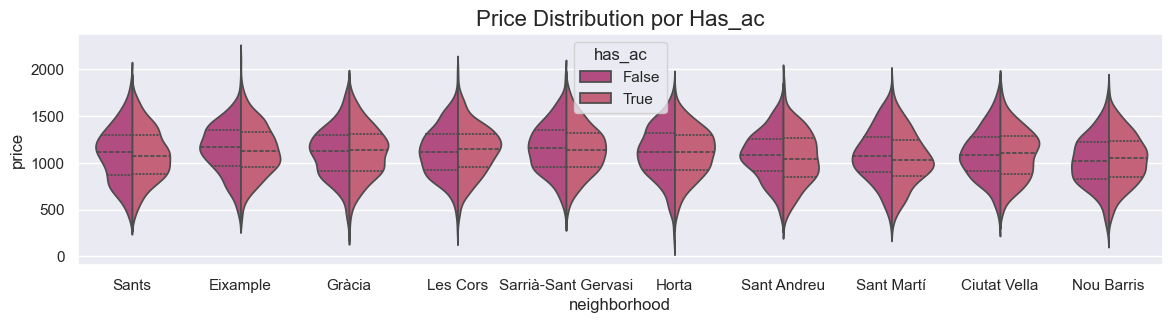

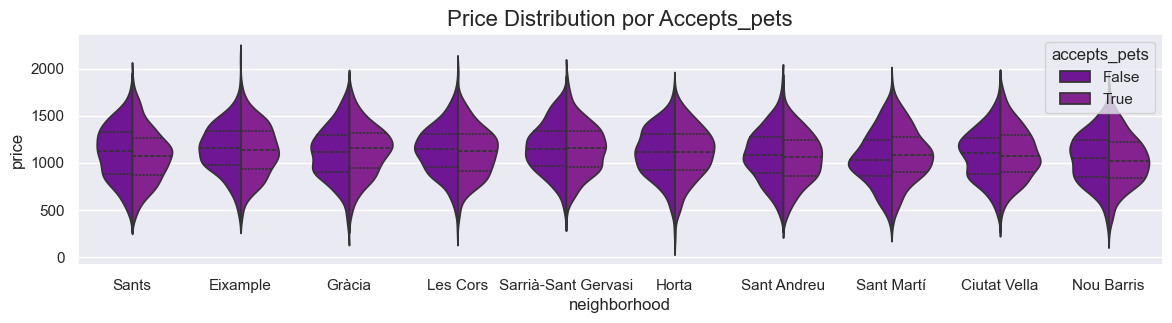

In [25]:
boolean_columns = ['is_furnished', 'has_pool', 'has_ac', 'accepts_pets']
color_indices = [
    (8, 10),  
    (7, 9),  
    (5, 7),
    (2,4)]

for i, (start, end) in zip(boolean_columns, color_indices):    
    plt.figure(figsize=(14, 3))
    sns.violinplot(data=df, x="neighborhood", y="price", hue=i,
                   split=True, inner="quart", fill=True, palette=plasma_colors[start:end]
                  )
    plt.title(f'Price Distribution por {i.capitalize()}', fontsize=16)
    plt.show()

This bar chart illustrates the mode of the number of rooms (num_rooms) across different neighborhoods based on binned ranges of property sizes (square_meter_bins)

/var/folders/fz/1mp_qssx1z546qc9z63nq3rm0000gn/T/ipykernel_43778/1421388444.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_modes = df.groupby(['neighborhood', 'square_meter_bins'])['num_rooms'] \


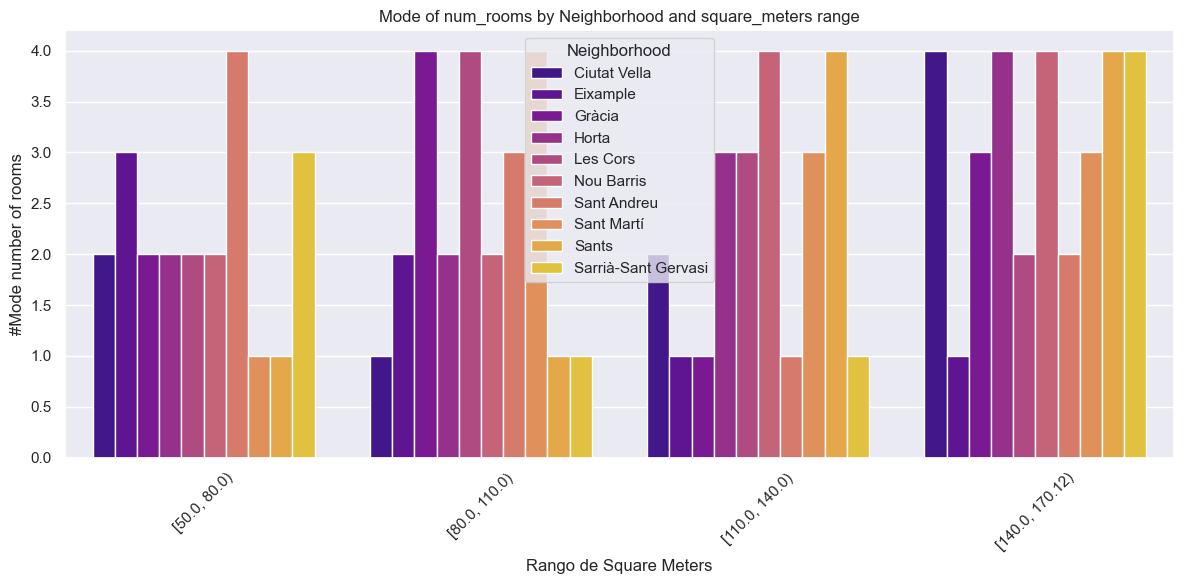

In [26]:
df['square_meter_bins'] = pd.cut(df['square_meters'], bins=4, right=False)

grouped_modes = df.groupby(['neighborhood', 'square_meter_bins'])['num_rooms'] \
                  .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_modes, x='square_meter_bins', y='num_rooms', hue='neighborhood', palette='plasma')  # Usar palette aquí
plt.xticks(rotation=45)
plt.title('Mode of num_rooms by Neighborhood and square_meters range')
plt.ylabel('#Mode number of rooms')
plt.xlabel('Rango de Square Meters')
plt.legend(title='Neighborhood')
plt.tight_layout()  # Ajustar el layout
plt.show()


The intuition here is that furnished apartments are offered for short-term rentals, aimed at attracting tourists who typically stay in central neighborhoods in Barcelona. However, no meaningful insight can be drawn from this data because the data-generating process is artificial, and any theoretical insight or intuition cannot be reflected in the data. :(

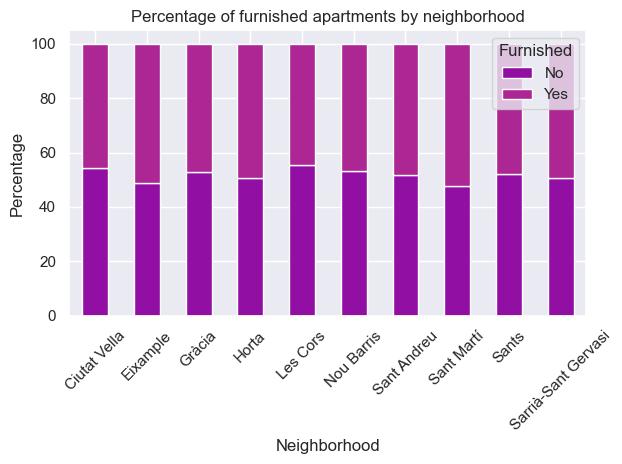

In [28]:
furnished_counts = df.groupby('neighborhood')['is_furnished'].value_counts().unstack(fill_value=0)

furnished_percentage = furnished_counts.div(furnished_counts.sum(axis=1), axis=0) * 100

furnished_percentage.plot(kind='bar', stacked=True, color=plasma_colors[-9:])

plt.title('Percentage of furnished apartments by neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Furnished', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()

In [29]:
df.groupby('neighborhood')['num_crimes'].value_counts(normalize=True).unstack(fill_value=0)

num_crimes,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
neighborhood,,,,,,,,,,,
Ciutat Vella,0.451444,0.052493,0.057743,0.052493,0.043307,0.053806,0.064304,0.041995,0.047244,0.068241,0.066929
Eixample,0.825485,0.026316,0.024931,0.006925,0.015235,0.018006,0.020776,0.011080,0.013850,0.018006,0.019391
Gràcia,0.609043,0.041223,0.025266,0.045213,0.035904,0.050532,0.031915,0.043883,0.033245,0.042553,0.041223
Horta,0.531250,0.052557,0.045455,0.051136,0.051136,0.044034,0.034091,0.042614,0.051136,0.039773,0.056818
Les Cors,0.734838,0.022567,0.031030,0.029619,0.025388,0.035261,0.036671,0.019746,0.012694,0.021157,0.031030
Nou Barris,0.081946,0.093470,0.089629,0.085787,0.098592,0.081946,0.090909,0.102433,0.085787,0.085787,0.103713
Sant Andreu,0.167331,0.083665,0.081009,0.092961,0.084993,0.087649,0.091633,0.070385,0.074369,0.079681,0.086321
Sant Martí,0.365922,0.053073,0.072626,0.072626,0.064246,0.058659,0.061453,0.057263,0.068436,0.058659,0.067039
Sants,0.323116,0.063857,0.077905,0.063857,0.086845,0.068966,0.061303,0.061303,0.049808,0.070243,0.072797


From the following plot, we can see that there are some neighborhoods that are more secure, as the percentages of properties without crimes are high. Those neighborhoods tipically are associated with higher properties prices, as:

- Sarria
- Eixample
- Gracia

This can indicate that adding an interaction between neighborhood and crimes can be a good explanatory variable.

<Axes: xlabel='floor', ylabel='price'>

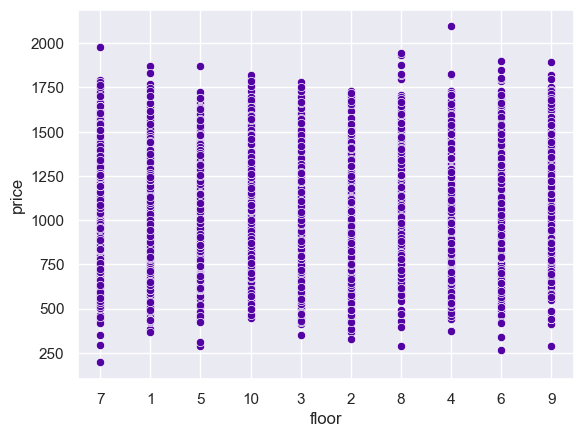

In [36]:
df['floor'] = df['door'].str.extract(r'(\d{1,2})º')
sns.scatterplot(x = 'floor', y='price', data=df)

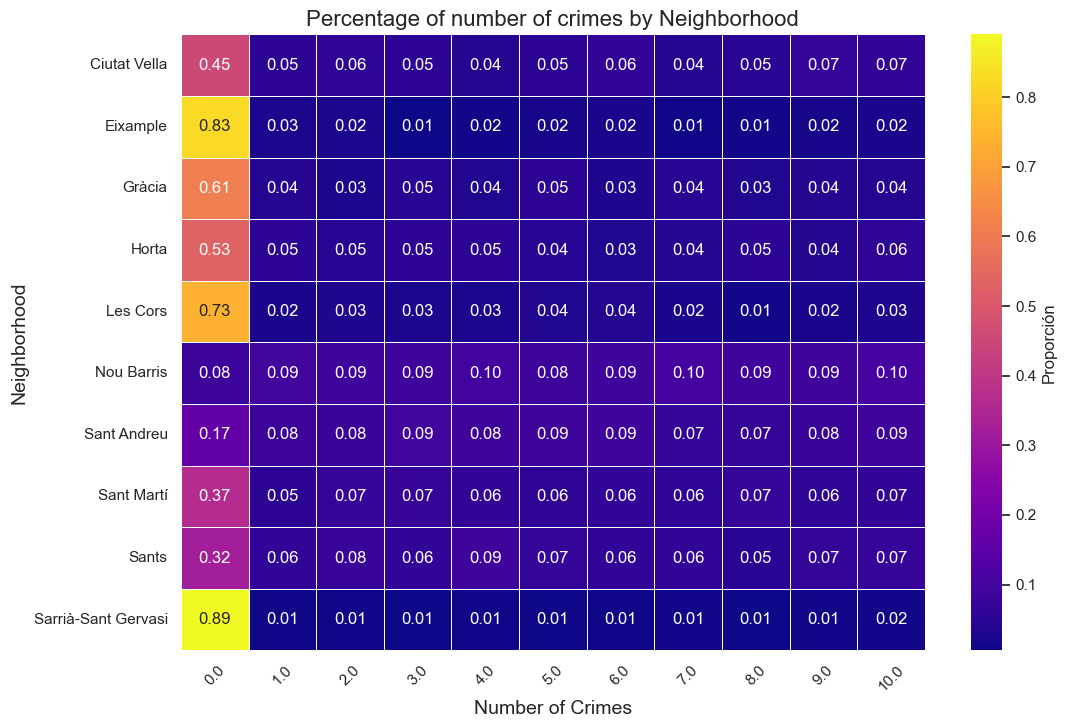

In [31]:
crime_distribution = df.groupby('neighborhood')['num_crimes'].value_counts(normalize=True).unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(crime_distribution, cmap='plasma', annot=True, fmt='.2f', cbar_kws={'label': 'Proporción'}, linewidths=0.5)
plt.title('Percentage of number of crimes by Neighborhood', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# **Handling Missing Data**

Identify and report any missing data present in the dataset. Implement suitable strategies to handle missing values, such as imputation or elimination, ensuring the integrity and quality of the data.


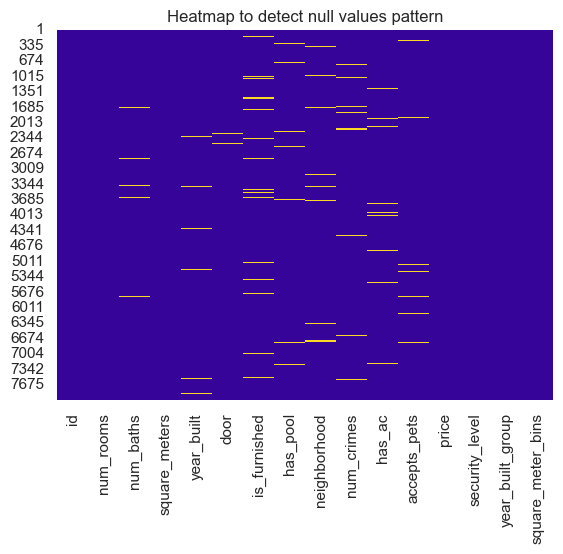

In [32]:
# Mapa de calor que muestra los nulos
sns.heatmap(df.isnull(), cbar=False, cmap=plasma_colors)
# Añadir título
plt.title('Heatmap to detect null values pattern')
plt.show()

In [34]:
df.columns

Index(['id', 'num_rooms', 'num_baths', 'square_meters', 'year_built', 'door',
       'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac',
       'accepts_pets', 'price', 'security_level', 'year_built_group',
       'square_meter_bins'],
      dtype='object')

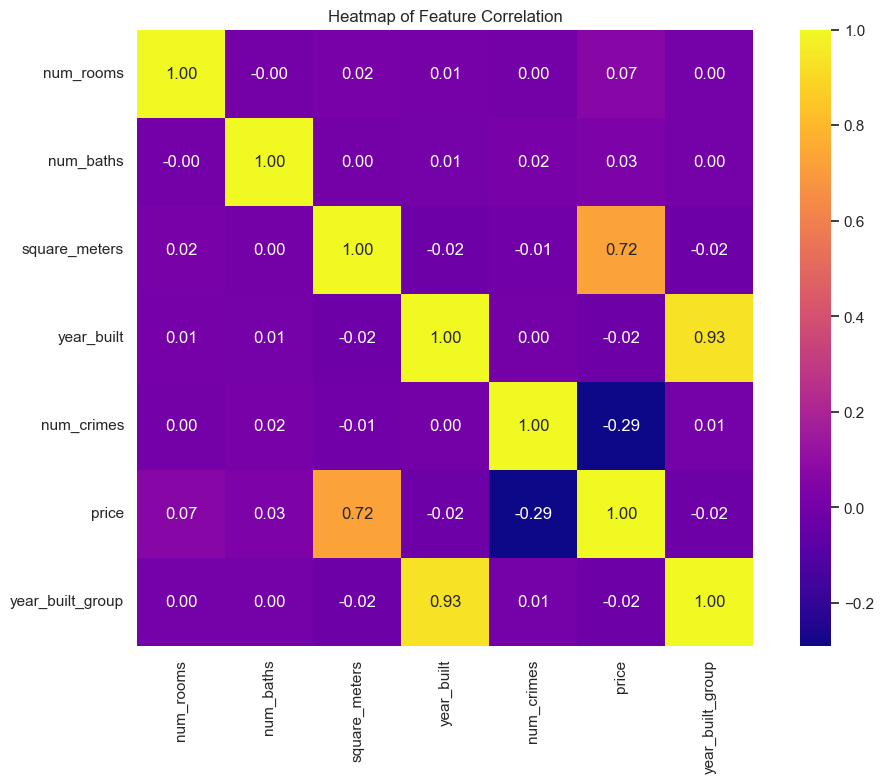

In [35]:
correlation_matrix = df[['num_rooms', 'num_baths', 'square_meters', 'year_built','num_crimes','price','year_built_group']].corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma', square=True, cbar=True)

# Títulos y etiquetas
plt.title('Heatmap of Feature Correlation')
plt.show()

# Conclusion
---

From this stage we can see that the features that present more correlation to the target are:

- ```square_meters```
- ```num_crimes```
- ```neighborhood```
- ```floor```

Additionally, we have noted the interactions among these features, indicating that they may collectively influence the target variable.

We also observed the presence of null values and outliers in the dataset, specifically negative values in ```square_meters``` and some irregularities in ```num_rooms```, which require attention and treatment.

To address these issues, we propose the following strategies:

- Categorical Variables: Impute missing values using the mode, taking into account the mode conditional on other correlated features within specified groups.
- Numerical Variables: Impute missing values using various techniques, including the mean, KNN imputation, and Random Forest imputation, with the option to condition the mean on other correlated features grouped appropriately.

These strategies aim to enhance the quality of the dataset, ensuring that the model training process is robust and less susceptible to biases introduced by missing or erroneous data.